# Deep Neural Network - Regression
# Boston Housing



**By Gaurav Padawe - 25th October, 2018**



**Housing Values in Suburbs of Boston**

The medv variable is the target variable.



# Data description

The Boston data frame has 506 rows and 14 columns.



**This data frame contains the following columns:**

- crim
per capita crime rate by town.

- zn
proportion of residential land zoned for lots over 25,000 sq.ft.

- indus
proportion of non-retail business acres per town.

- chas
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

- nox
nitrogen oxides concentration (parts per 10 million).

- rm
average number of rooms per dwelling.

- age
proportion of owner-occupied units built prior to 1940.

- dis
weighted mean of distances to five Boston employment centres.

- rad
index of accessibility to radial highways.

- tax
full-value property-tax rate per $10,000.

- ptratio
pupil-teacher ratio by town.

- black
1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

- lstat
lower status of the population (percent).

- medv
median value of owner-occupied homes in $1000s.



# Source:

**Harrison, D. and Rubinfeld, D.L. (1978) Hedonic prices and the demand for clean air. J. Environ. Economics and Management 5, 81–102.**

**Belsley D.A., Kuh, E. and Welsch, R.E. (1980) Regression Diagnostics. Identifying Influential Data and Sources of Collinearity. New York: Wiley.**

# Evaluation:

The scoring is based on the **RMSE**, that is

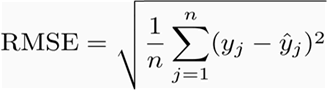

- Importing Required Libraries

In [233]:
import tensorflow as tf
from tensorflow.keras.datasets import boston_housing
from sklearn.preprocessing import StandardScaler
import numpy as np

- This dataset is accessible directly in TensorFlow and is splitted into features (independent variables) and Target (dependent variable).

In [234]:
(features, target),_ = boston_housing.load_data(test_split=0)

- We've 506 Rows and 13 Predictors, while 506 Rows in Target

In [235]:
features.shape, target.shape

((506, 13), (506,))

- Previewing Data

In [236]:
features, target

(array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
         3.96900e+02, 1.87200e+01],
        [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
         3.95380e+02, 3.11000e+00],
        [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
         3.75520e+02, 3.26000e+00],
        ...,
        [1.83377e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
         3.89610e+02, 1.92000e+00],
        [3.58090e-01, 0.00000e+00, 6.20000e+00, ..., 1.74000e+01,
         3.91700e+02, 9.71000e+00],
        [2.92400e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
         2.40160e+02, 9.81000e+00]]),
 array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
        17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
        32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
        23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
        12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
   

- As we can see above that each feature are is in different scale (unit), we need to normalise the Input set. We can use **Tensorflow's "Batch Normalisation"** which can be done while creating **Placeholders**. But I'm gonna approach with **Scikit learn's StandardScaler** and pass the same as an input to Placeholders.

In [237]:
ss = StandardScaler()
features_norm = ss.fit_transform(features)
features_norm

array([[-0.2770909 , -0.48772236, -0.43725801, ...,  1.17646583,
         0.44105193,  0.85042548],
       [-0.41798397,  3.053142  , -1.32876412, ..., -1.73641788,
         0.42438611, -1.33768728],
       [ 0.14950428, -0.48772236,  1.01599907, ...,  0.80657583,
         0.20663395, -1.31666121],
       ...,
       [-0.20711567, -0.48772236,  1.2319449 , ..., -1.73641788,
         0.36112176, -1.50449408],
       [-0.37884533, -0.48772236, -0.72032214, ..., -0.48803915,
         0.38403727, -0.41254031],
       [-0.08024209, -0.48772236,  1.2319449 , ..., -1.73641788,
        -1.2775016 , -0.39852293]])

- **tf.reset_default_graph()** is needed to reset Graph , it is required only for Jupyter Notebook. That will reset peviously created/executed graphs to prevent conflicts.

In [238]:
tf.reset_default_graph()

# Building the Graph

- A placeholder is simply a variable that we will assign data to at a later time. It allows us to create our operations and build our computation graph, without needing the data. In TensorFlow terminology, we then feed data into the graph through these placeholders.




- Below we are creating placeholders for our Input Variables and Target. It will hold the values of them as and when needed.

In [239]:
# Input features placeholder
x = tf.placeholder(shape=[None, 13], name='x-input', dtype=tf.float32)

# Actual price placeholder
y = tf.placeholder(shape=[None], name='y-input', dtype=tf.float32)

#x_norm = tf.layers.batch_normalization(x, training=True)

- In Tensorflow, a Variable is a Tensor whose value can be changed at any given time.


- We're creating Variables below which will represent our Weights and Bias, Point to Note is we're having them as **zeros** but usually in Machine Learning models they are initialised randomly by default. 


- **Weights/Coefecients** are equal to number of features in input data , we've 13 in this case. It is a strength of connection, it represents how much influnce does it has on our output.


- While **bias/intercept** will be 1 , it states how far off our predictions are from real values.

In [240]:
w = tf.Variable(tf.zeros(shape=[13,1]), dtype=tf.float32, name='weights')
b = tf.Variable(tf.zeros(shape=[1]), dtype=tf.float32, name='bias')

- Now, we've to form our Equation **y = x.w + b**


- Note: it is **x.w + b** and not **w.x + b**


- **w.x + b** meaning **(1 x D) x (n x D)** because our x will proabably have D number of features/dimensions. If you multiply in such a way it won't make any sense.


- And that is why we go with **x.w + b** , i.e , (n x D) x (1 x D)

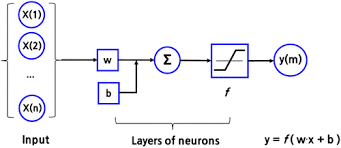

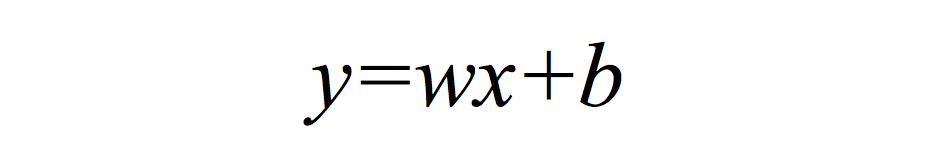

- Further , we need to create graph/node of our **Loss (cost) function**


- Our Loss function is RMSE (Root Mean Squared Error) , generally we use this as a evaluation funtion for Regression problems. 

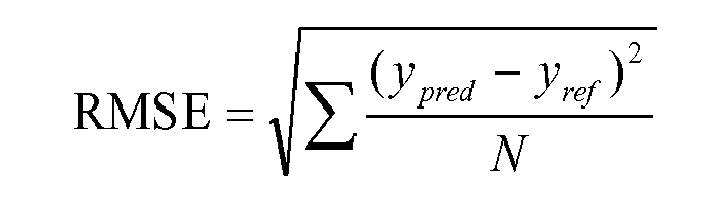

In [245]:
pred = tf.add(tf.matmul(x, w), b, name='prediction')
loss = tf.reduce_mean(tf.square(pred - y), name='loss_function')

- Let us implement **Gradient Optimizer.**


- **Gradient Descent** is used to find the best possible value for our loss function. Lesser value states our model is good at Prediction. 

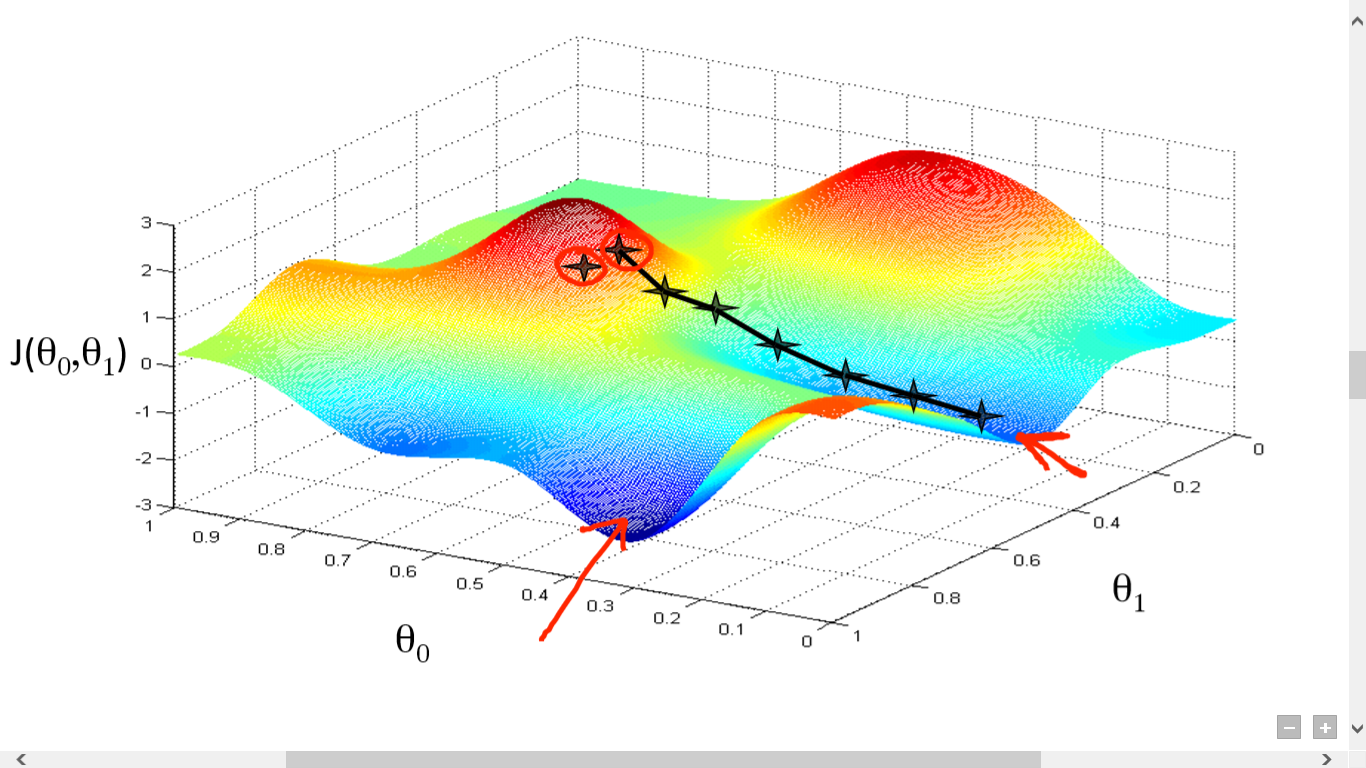

In [249]:
grad_opt = tf.train.GradientDescentOptimizer(0.01).minimize(loss)

# Execution of our Graph

- We need to push our session using **"tf.Session()"** in order to Trigger it.


- Variables and Session must always be Initialised before we move to any other step.

In [247]:
session = tf.Session()

var_init = session.run(tf.global_variables_initializer())

- **Epochs** meaning **Iterations**, a typical term for the repetition of a process.


- We're setting our Iteration count to **1000** , ie , our optimizer will undergo 1000 Iterations/Repetition till the **magnitude of our Loss (Cost) Function will show MINIMAL variation or go Constant.**


- Now, we need to RUN session by passing our **Optimizer and Loss Function + Features and Target.**


- And Print the value it captures at every Iteration.

In [248]:
epochs = 1000

for itr in range(epochs):
    opt, train_loss = session.run([grad_opt, loss], feed_dict={x:features_norm, y:target})
    
    if itr % 10 ==0:
        print ('Training loss at Iteration ' + str(itr) + ' is ' + str(train_loss))
    

Training loss at Iteration 0 is 592.12213
Training loss at Iteration 10 is 423.38647
Training loss at Iteration 20 is 310.71173
Training loss at Iteration 30 is 235.49384
Training loss at Iteration 40 is 185.27191
Training loss at Iteration 50 is 151.75706
Training loss at Iteration 60 is 129.36684
Training loss at Iteration 70 is 114.42621
Training loss at Iteration 80 is 104.45556
Training loss at Iteration 90 is 97.7953
Training loss at Iteration 100 is 93.347084
Training loss at Iteration 110 is 90.38066
Training loss at Iteration 120 is 88.403656
Training loss at Iteration 130 is 87.076744
Training loss at Iteration 140 is 86.194565
Training loss at Iteration 150 is 85.60106
Training loss at Iteration 160 is 85.206665
Training loss at Iteration 170 is 84.95078
Training loss at Iteration 180 is 84.77176
Training loss at Iteration 190 is 84.64672
Training loss at Iteration 200 is 84.57411
Training loss at Iteration 210 is 84.52649
Training loss at Iteration 220 is 84.48438
Training 

- We can observe that at at some point our Loss goes constant having the value **84.42178**


- But we can identify that Training loss at **Iteration 340 is 84.416084** , marking it as the lowest of all.

# Logging Information

- **Logging Information** can be used with TensorBoard.


- **First Step:** Define a summary scalar object to capture loss.


- **Second Step:** Define the logs directory to store the logs, you can change the value.


- **Third Step:** Initialize Writer for Logging.


- **Fourth Step:** Create saver to save the graph.

In [250]:
loss_log = tf.summary.scalar('Training_loss', loss)

directory = 'C:/Users/Gaurav/Desktop/'

writer = tf.summary.FileWriter(directory, graph=tf.get_default_graph())

saver = tf.train.Saver()